In [1]:
import pandas as pd # Proporciona estructuras de datos y herramientas para el análisis eficiente de datos tabulares, series temporales y matrices etiquetadas o no etiquetadas.
import plotly.express as px # Permite crear diversas figuras a la vez.
import seaborn as sns
import matplotlib.pyplot as plt # Está diseñada para crear gráficos y visualizaciones interactivas de datos, por ejemplo, para trazar las curvas de aprendizaje y evaluar el proceso de entrenamiento.
import numpy as np # Se utiliza para crear arreglos multidimensionales y realizar operaciones matemáticas, lógicas y de álgebra lineal, además de la generación de números aleatorios.
import tensorflow as tf #  Librería desarrollada por Google, es de las más utilizadas para diseñar, entrenar, validar y probar el desarrollo de una red neuronal.
from sklearn.model_selection import train_test_split # Esta biblioteca proporciona el método train_test_split para dividir el conjunto de datos inicial en los conjuntos de entrenamiento y validación.
from sklearn.preprocessing import StandardScaler # Estándariza las características eliminando la media y escalando a una varianza unitaria. (z = (x - u) / s)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay # Se utiliza para gráficar en una matriz una comparación entre los valores reales y predichos

In [2]:
data = pd.read_csv('heart.csv')
df = data

In [3]:
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce') # Se convierte todo el dataframe a valores numéricos para garantizar que no haya problemas con los cálculos posteriores.
df = df.dropna() # Se elimina cualquier fila que contenga valores NaN.

In [4]:
df # Se muestra el dataframe.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


En el dataset se pueden observar los siguientes datos para la predicción:
1. Edad (29-77)
2. Sexo (0-1)
3. Tipo de dolor en el pecho (0-4)
4. Presión Arterial en reposo (94-200)
5. Colesterol total (126-564)
6. Azúcar en la sangre en ayunas mayor a 120 mg/dl (0-1)
6. Resultados de ElectroCardiograma en reposo (0-2)
7. Frecuencia cardíaca máxima alcanzada (71-202)
8. Angina de pecho (0-1)
9. Depresión ST inducido por esfuerzo ergométrico (0-6.2)
10. Pendiente de la depresión ST (0-2)
12. Número de arterias importantes (0-2)
13. Talasemia (0-3)


In [5]:
df.describe() # Genera un resumen estadístico del dataframe, obteniendo información como: el número de datos, promedio, desviación estándar, valor mínimo, el valor por debajo del cual se encuentra el 25%, el valor que separa a los datos en dos partes iguales, el valor por debajo del cual se encuentra el 75% de los datos y el valor máximo.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


En el dataset se pueden observar los siguientes datos para la predicción:
1. Edad (29-77) (Numérico)
2. Sexo (0-1) (Categórico)
3. Tipo de dolor en el pecho (0-4) (Categórico)
4. Presión Arterial en reposo (94-200) (Numérico)
5. Colesterol total (126-564) (Numérico)
6. Azúcar en la sangre en ayunas mayor a 120 mg/dl (0-1) (Numérico)
6. Resultados de ElectroCardiograma en reposo (0-2) (Categórico)
7. Frecuencia cardíaca máxima alcanzada (71-202) (Numérico)
8. Angina de pecho (0-1) (Categórico)
9. Depresión ST inducido por esfuerzo ergométrico (0-6.2) (Numérico)
10. Pendiente de la depresión ST (0-2) (Categórico)
12. Número de arterias importantes (0-2) (Categórico)
13. Talasemia (0-3) (Categórico)

De los siguientes datos, se puede observar nuevamente cómo los datos de tipo numérico, son los que cuentan con una mayor desviación estándar. De la base de datos, se observa que cuenta con una mayor cantidad de datos categóricos, coincidiendo con la anterior base de datos. Por lo que, se puede inferir que esta es la base de datos completa, donde se puede observar que a comparación de la anterior la entrada 13, cuenta con un valor máximo de 3, mientras que en la anterior con una de 7, lo que sea probablemente un error, donde veremos como esto afectará al rendimiento de nuestra red, tratándose esta entrada de un dato categórico.

In [6]:
# Scatter plot matrix
features = df.drop(["target"], axis=1).columns # Se elimina la columna Heart Disease.
fig = px.scatter_matrix(data_frame=df, # Se crea una matriz de gráficos de dispersión con los datos del DataFrame.
                        dimensions=features, # Se especifican las columnas a incluir en el gráfico, sin Heart Disease.
                        color=df['target']) # Se utiliza la columna 'Occupancy' para colorear los puntos en función de la ocupación.
fig.update_traces(marker = dict(size=4), diagonal_visible=False, showupperhalf=False) # Se actualiza el tamaño de los marcadores, se ocultan las diagonales y se muestra solo la mitad inferior de la matriz.
fig.update_layout(width=900, height=600, title="Heart Disease Detection", font_size=9) # Se ajustan las dimensiones del gráfico, se personaliza el título y el tamaño de la fuente del gráfico.
fig.show() # Se muestra la matriz con los gráficos de dispersión.

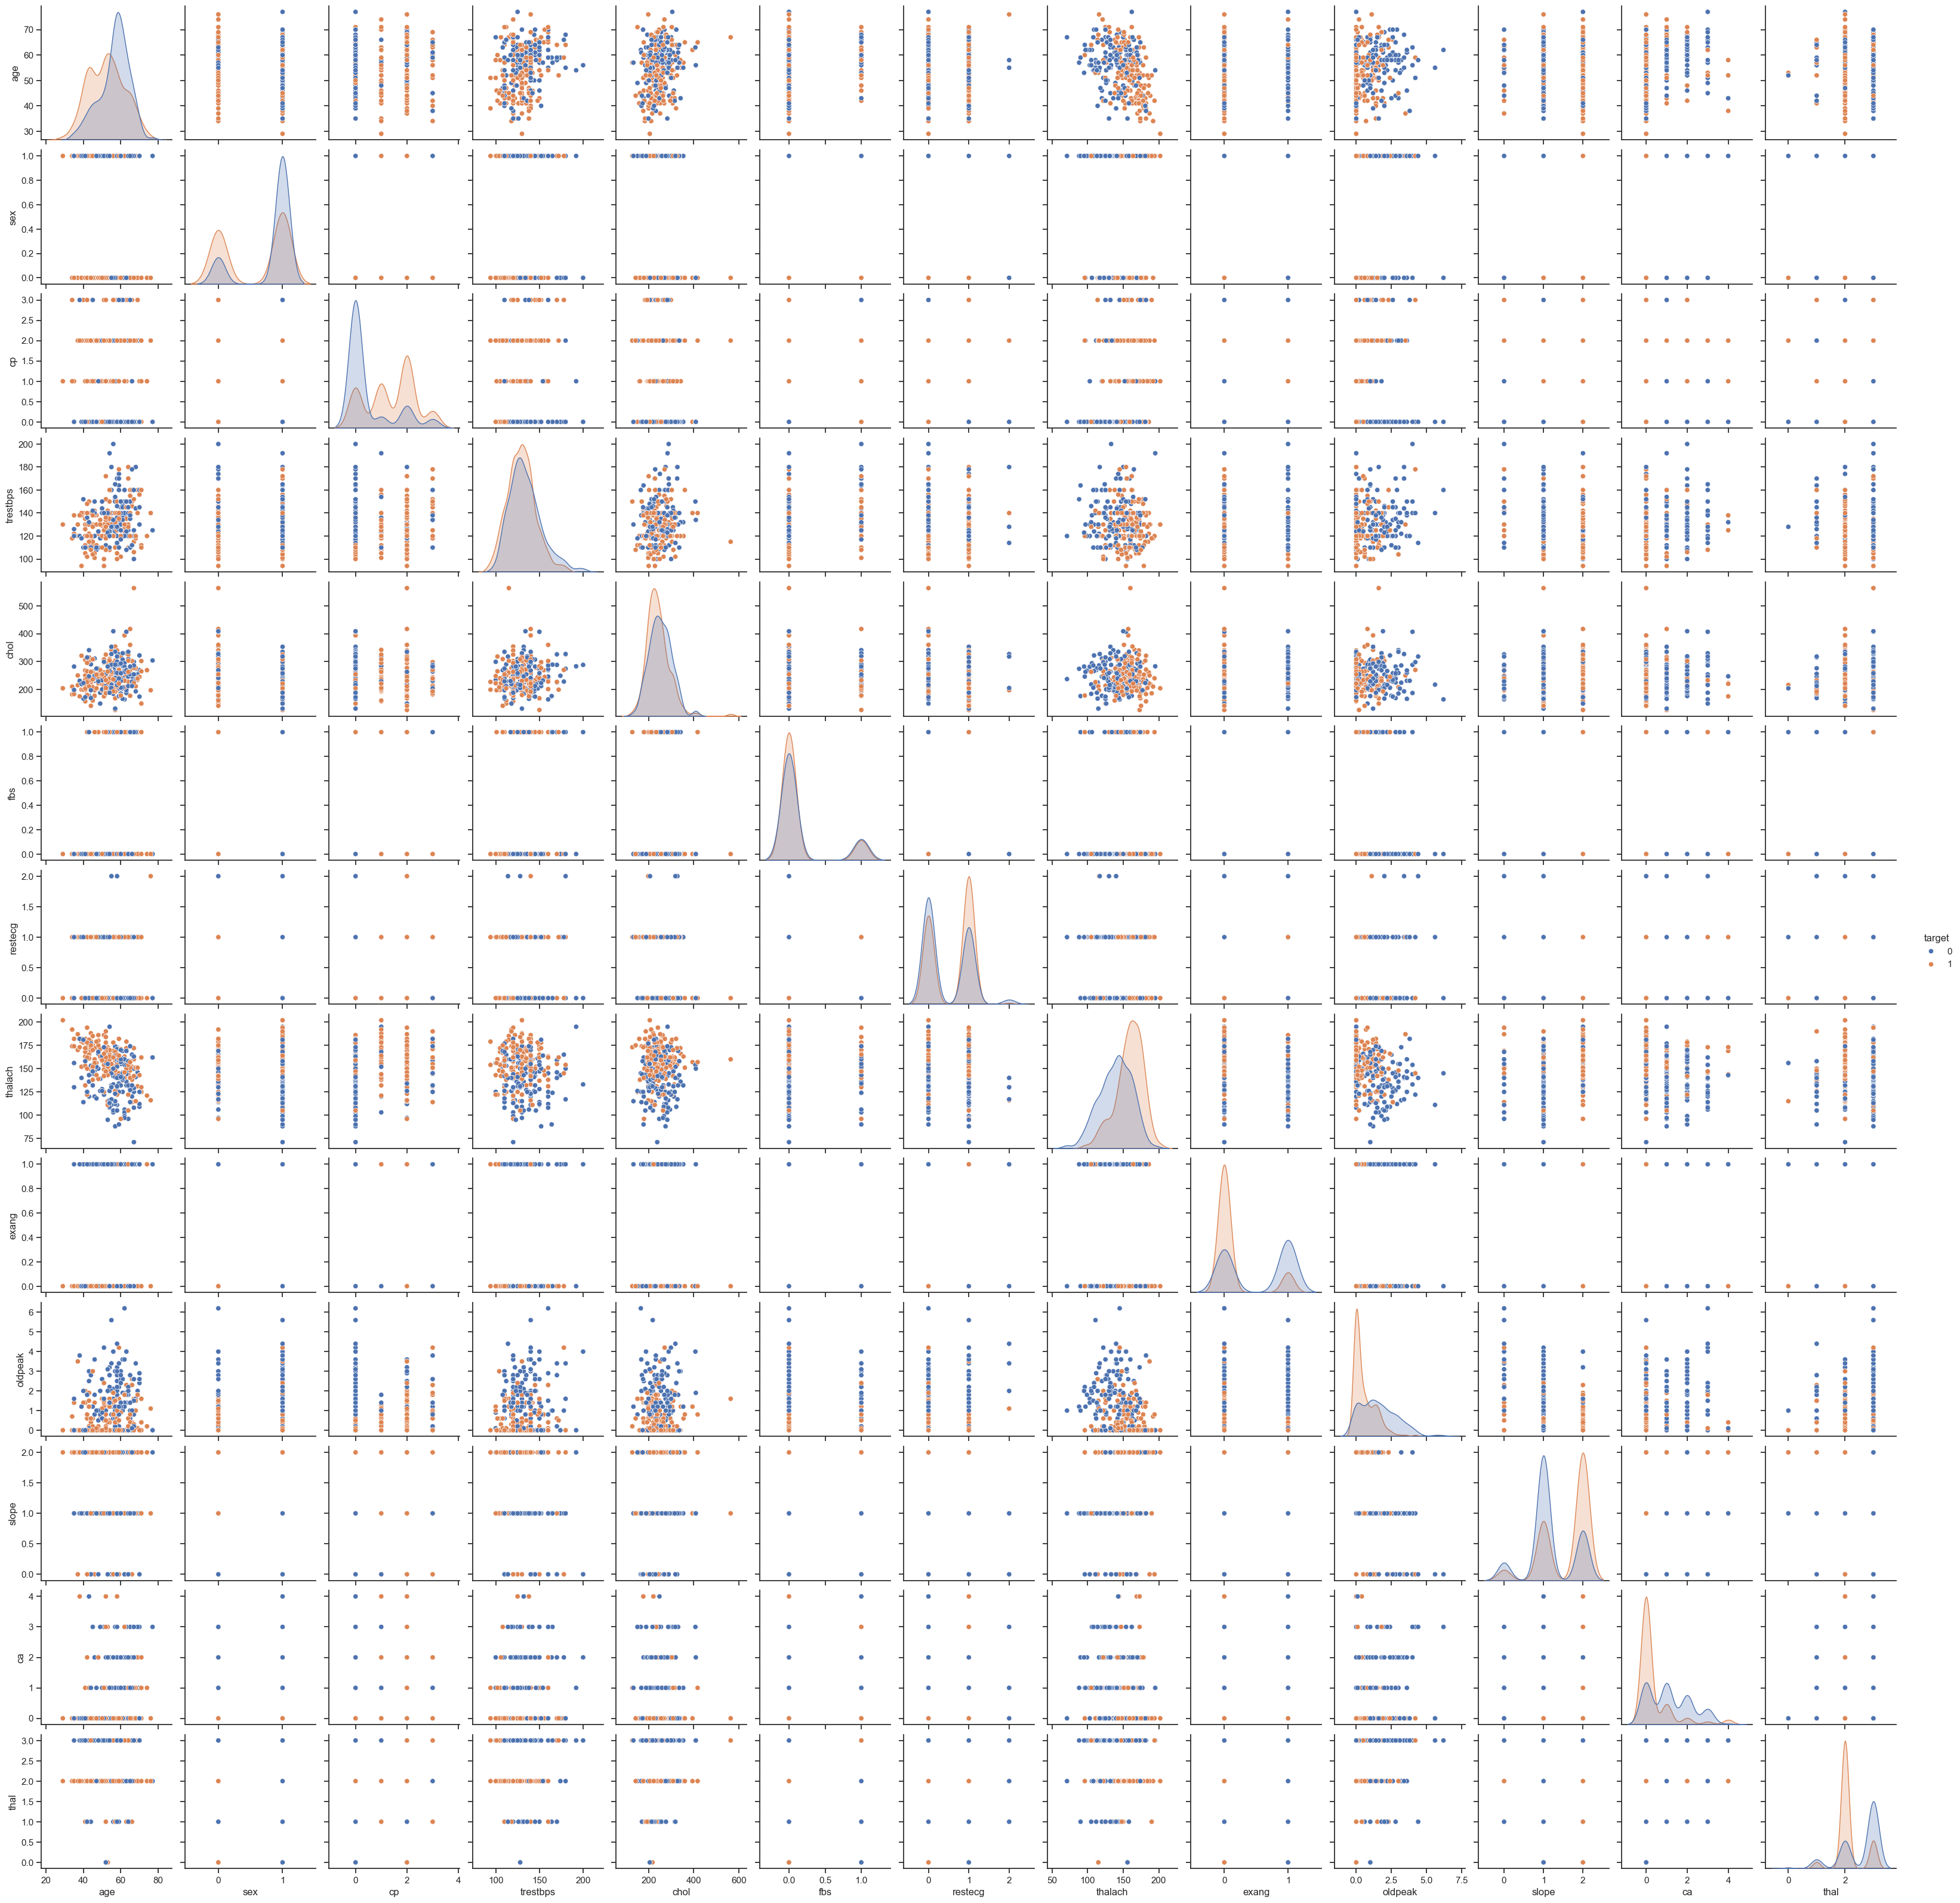

In [7]:
sns.set_theme(style="ticks") # Se estable el estilo del gráfico de pares.
sns.pairplot(df, hue="target"); # Se crea un gráfico de pares para visualizar la relación entre todas las variables del dataframe.

En relación con las variables de datos, alguna división que se puede observar es el ritmo cardíaco con algunas de las otras variables. Sin embargo, aun así resulta difícil notar algunas de las relaciones entre las entradas.

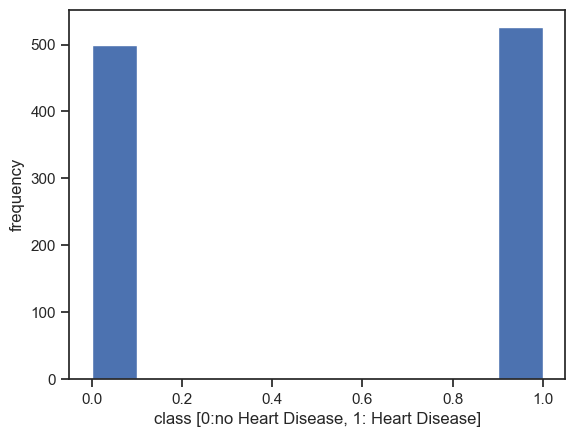

In [8]:
plt.hist(df['target']); # Se crea un histograma de la columna occupancy del dataframe.
plt.xlabel('class [0:no Heart Disease, 1: Heart Disease]') # Se etiqueta el eje x para indicar lo que representa: 0 para no ocupado y 1 para ocupado.
plt.ylabel('frequency'); # Se etiqueta el eje Y para mostrar que representa la frecuencia de las clases.

Se puede observar cómo es una base de datos relativamente balanceada, con un poco más de datos de salida verdaderos que falsos.

In [9]:
# Set a global seed for reproducibility
tf.random.set_seed(4500) # Se fija una semilla para obtener respuestas similares al trabajar con números aleatorios.

In [10]:
X = df.drop(["target"], axis=1) # Se elimina la columna occupancy para las entradas (X).
y = df['target']  # El occupancy se convierte en la salida o Y, para predecir si esta ocupada o no la habitación.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True) # Se separan los datos de entrenamiento y prueba, corresponiendo el 80% de los datos a el entrenamiento y el resto para prueba, con un random state de 42, para obtener respuestas similares al trabajar con aleatoriedad, además de la inclusión de la función shuffle, ayuda a que exista más esparcimiento entre los datos.

In [47]:
# Standardise features
scaler = StandardScaler() # Herramienta para estandarizar datos y evitar sesgos.
X_train = scaler.fit_transform(X_train) # Estandariza los datos de x train.
X_test = scaler.transform(X_test) # # Estandariza los datos de x test.

In [48]:
# Define the model

def get_model():
    model = tf.keras.Sequential([  # Se crea un modelo secuencial de Keras.
        tf.keras.layers.InputLayer(shape=(len(X.columns),)), # Se establecen 5 entradas para: temperatura, humedad, luz, co2 y relación de humedad.
        tf.keras.layers.Dense(16, activation='relu' ), 
        tf.keras.layers.Dense(1, activation='sigmoid' ) # Capa con solamente una neurona, y con la función de activación sigmoidal.
    ])
    return model

model = get_model() # Se obtiene el modelo.

In [49]:
model.summary() # Se devuelve un análisis del modelo.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test) # Se evalua la precisión del modelo con el conjunto de entrenamiento antes de entrenar.
print(f"Test Accuracy: {accuracy:.4f}") # Se muestran los resultados.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4118 - loss: 0.9789  
Test Accuracy: 0.3902


In [52]:
from keras.callbacks import EarlyStopping

# Definir el callback de Early Stopping
early_stopping = EarlyStopping(
    patience=50,
    monitor='val_loss',
    min_delta=0.001,
    restore_best_weights=True,
)

# Entrenar el modelo con el callback que minimiza el learning rate
history = model.fit(
    X_train, y_train,
    epochs=600,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  # Añadir el callback de EarlyStopping scheduler
)

Epoch 1/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2842 - loss: 1.0309 - val_accuracy: 0.4512 - val_loss: 0.8268
Epoch 2/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3316 - loss: 0.8892 - val_accuracy: 0.5305 - val_loss: 0.7445
Epoch 3/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4472 - loss: 0.7797 - val_accuracy: 0.6037 - val_loss: 0.6803
Epoch 4/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5886 - loss: 0.6941 - val_accuracy: 0.6707 - val_loss: 0.6290
Epoch 5/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6630 - loss: 0.6258 - val_accuracy: 0.7317 - val_loss: 0.5892
Epoch 6/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7229 - loss: 0.5726 - val_accuracy: 0.7683 - val_loss: 0.5571
Epoch 7/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7743 - loss: 0.5299 - val_accuracy: 0.7805 - val_loss: 0.5302
Epoch 8/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8101 - loss: 0.4953 - val_accuracy: 0.7744 - v

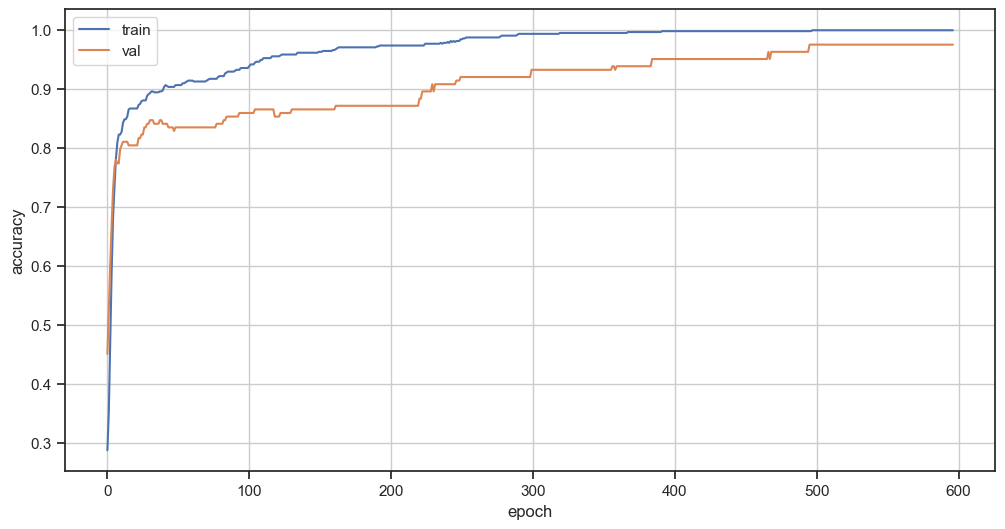

In [53]:
# Plot validation and testing accuracy
plt.figure(figsize=(12,6)) # Se establece el tamaño de la gráfica.
plt.plot(history.history['accuracy']) # Se gráfica la exactitud del modelo a través de las épocas.
plt.plot(history.history['val_accuracy']) # Se gráfica la exactitud del modelo con los datos de validación del entrenamiento a través de las épocas.
plt.xlabel('epoch') # El eje x corresponde a las épocas.
plt.ylabel('accuracy') # El eje y corresponde a las exactitud.
plt.legend(['train', 'val']) # Se añade una leyenda para distinguir entre entrenamiento y validación.
plt.grid(); # Se añade una cuadrícula a la gráfica para mejorar la legibilidad.

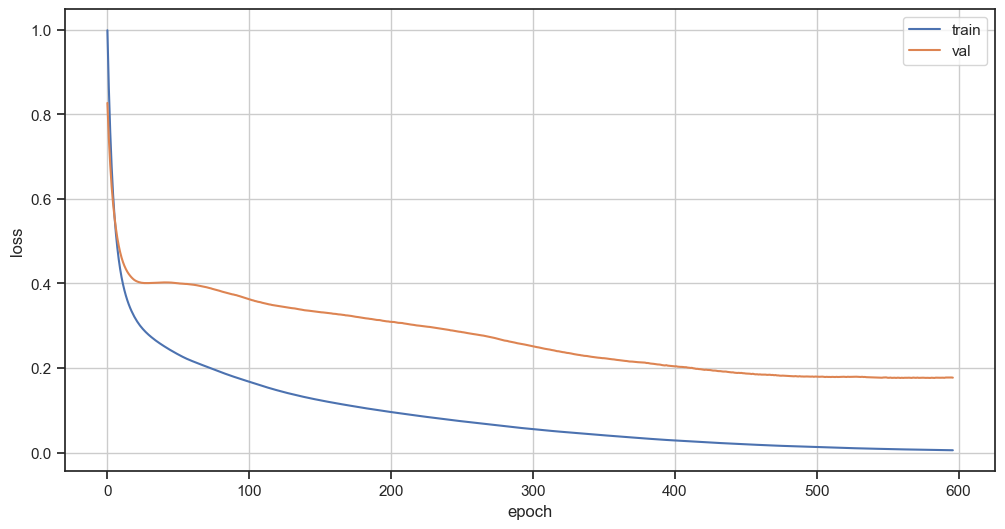

In [54]:
# Plot validation and testing loss
plt.figure(figsize=(12,6)) # Se establece el tamaño de la gráfica.
plt.plot(history.history['loss']) # Se gráfica la pérdida del conjunto de entrenamiento a lo largo de las épocas.
plt.plot(history.history['val_loss']) # Se gráfica la pérdida con los datos de validación del entrenamiento a lo largo de las épocas.
plt.xlabel('epoch') # El eje x corresponde a las épocas.
plt.ylabel('loss') # El eje y corresponde a la pérdida.
plt.legend(['train', 'val'])  # Se añade una leyenda para distinguir entre entrenamiento y validación.
plt.grid(); # Se añade una cuadrícula a la gráfica para mejorar la legibilidad.

Se observa cómo existe una mayor precisión y menor pérdida en los datos de entrenamiento, algo que coincide con lo visto en clase, donde se mencionó que siempre debe ser menor en los datos de validación.

In [55]:
# Print weights
weights = model.layers[0].get_weights() # Se muestran los pesos de las entradas.
print(weights) # Se muestran los pesos.

[array([[-3.58583003e-01,  4.58837181e-01,  2.68170685e-01,
        -1.86895892e-01, -1.48731351e+00, -1.39265656e-01,
        -3.63697946e-01, -2.46645615e-01, -2.67717451e-01,
         7.18917012e-01,  1.37139410e-01, -9.90271926e-01,
        -1.17663383e-01, -2.89356083e-01, -5.85060656e-01,
        -1.21673977e+00],
       [-5.22776663e-01, -1.77127331e-01,  9.90734577e-01,
         9.42063093e-01, -7.20012307e-01,  1.25033569e+00,
        -4.61276710e-01,  2.18561321e-01, -1.05800617e+00,
         1.78129089e+00,  4.64861423e-01, -2.03908011e-01,
        -1.33633807e-01,  8.99858296e-01,  2.11279318e-01,
        -1.53230405e+00],
       [-2.24174529e-01, -8.54738772e-01, -9.18080747e-01,
        -1.00846314e+00,  2.48665631e-01, -3.18898886e-01,
        -1.37449312e+00, -7.43624568e-01,  7.78309703e-01,
         1.03566158e+00, -5.65579116e-01, -8.49715948e-01,
        -6.16162479e-01,  2.88816750e-01,  3.01351786e-01,
         8.97837460e-01],
       [ 9.50120986e-01,  3.79421502

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


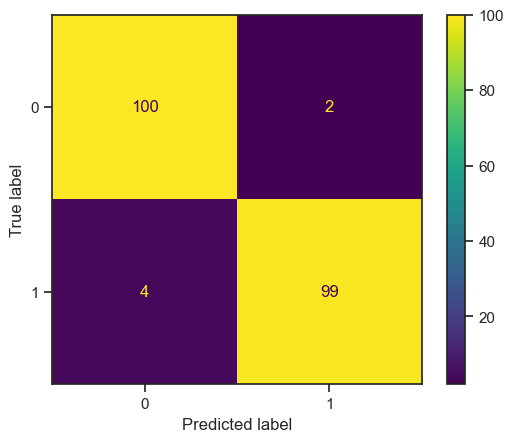

In [56]:
# Predecir valores binarios (0 o 1) con un umbral de 0.5
y_predictions = (model.predict(X_test) > 0.5).astype(int)  # Conviertes las probabilidades en valores binarios

# Calcular la matriz de confusión
c_matrix = confusion_matrix(y_true=y_test, y_pred=y_predictions)

# Mostrar la matriz de confusión
display_matrix = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
display_matrix.plot()  # Puedes usar diferentes mapas de color como 'Blues' para mayor visibilidad

In [57]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test) # Se evalua el modelo con los datos de prueba.
print(f"Test Accuracy: {accuracy:.4f}") # Se muestra la precisión y la pérdida.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9616 - loss: 0.2644  
Test Accuracy: 0.9707


In [58]:
def get_performance_metrics(c_matrix):
    tn, fp, fn, tp = c_matrix[0][0], c_matrix[0][1], c_matrix[1][0], c_matrix[1][1] # Se obtienen los datos de la matriz de confusión, (verdaderos negativos, falsos positivos, falsos negativos y verdaderos positivos).

    accuracy = (tp + tn) / (tp + tn + fp + fn) # Exactitud.
    precision = tp / (tp + fp) # Precisión.
    recall = tp / (tp + fn) # Sensibilidad o Recall.
    specificity = tn / (tn + fp) # Especificidad.
    f1_score = 2 * (precision * recall)/(precision + recall) # F1-score.
    return accuracy, precision, recall, specificity, f1_score # Se devuelven los valores de las métricas de rendimiento.

accuracy, precision, recall, specificity, f1_score = get_performance_metrics(c_matrix) # Se obtienen las métricas de desempeño usando la matriz de confusión.

# Se imprimen los resultados con 6 decimales
print(f"Accuracy: {accuracy:0.6f}")
print(f"Precision: {precision:0.6f}")
print(f"Recall: {recall:0.6f}")
print(f"Specificity: {specificity:0.6f}")
print(f"F1-score: {f1_score:0.6f}")

Accuracy: 0.970732
Precision: 0.980198
Recall: 0.961165
Specificity: 0.980392
F1-score: 0.970588




Referencias:
- Heart disease dataset. (2019). Kaggle. Recuperado el 27 de septiembre del 2024 de: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

- Agarwal, R. (2023). Complete guide to the ADAM Optimization Algorithm. Recuperado el 26 de septiembre del 2024 de: Built In. https://builtin.com/machine-learning/adam-optimization

- Computer Science Engineering. (2017). 2.1.4 Gradient Descent in Practice II Learning Rate by Andrew Ng [Video]. YouTube. Recuperado el 26 de septiembre del 2024 de: https://www.youtube.com/watch?v=zLRB4oupj6g

- EvidentlyAI. (n.d.). Accuracy vs. precision vs. recall in machine learning: what’s the difference? Recuperado el 26 de septiembre del 2024 de: https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall
